In [ ]:
from src.training.trainer import train_one_epoch
from src.sampling import langevin_sampling, generate_samples
from src.models.energy_model import EBM
from src.utils.model_utils import set_dropout
from src.evaluation.noise import add_gaussian_noise


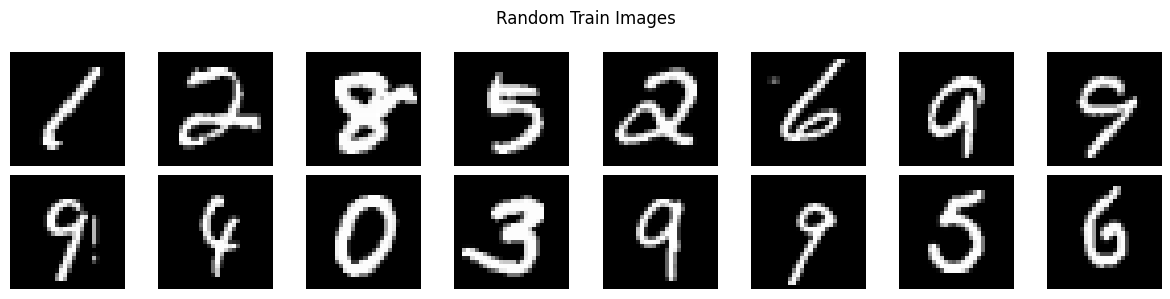

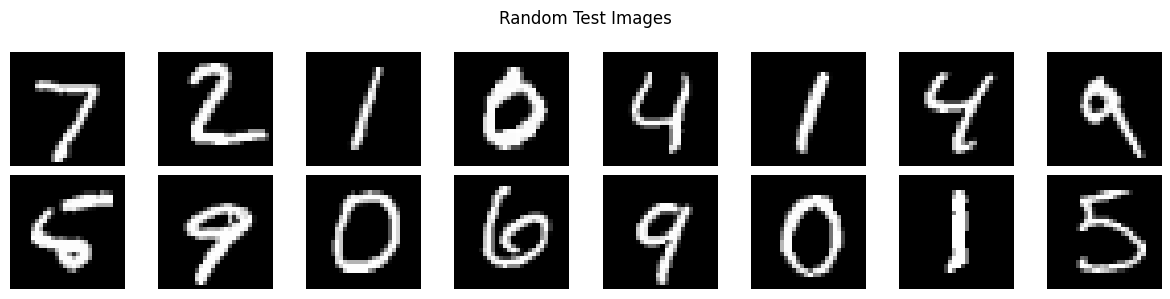

In [18]:
# Train batch
x_train, y_train = next(iter(train_loader))
show_batch(x_train, title="Random Train Images")

# Test batch
x_test, y_test = next(iter(test_loader))
show_batch(x_test, title="Random Test Images")

In [24]:
history = {
    "loss": [],
    "data": [],
    "reg": [],
    "E_real": [],
    "E_fake": [],
}

In [ ]:
history = {}
best_delta = float('inf')
epochs = int(cfg["training"]["epochs"])
checkpoint_path = os.path.join(checkpoint_dir, "ebm_best_model.pth")

In [ ]:
# 1. Base hyperparameters (Loaded from CFG)
base_l_steps = int(cfg["langevin"]["steps"])
base_l_step_size = float(cfg["langevin"]["step_size"]) 
base_l_noise = float(cfg["langevin"]["noise_scale"]) 
base_lr = float(cfg["training"]["lr"])
base_reg = float(cfg["training"]["lambda_reg"])
base_dropout = float(cfg["model"]["dropout_rate"])

In [ ]:
# 2. Dynamic trackers (Initialized)
current_l_step_size = base_l_step_size
current_l_noise = base_l_noise
current_l_steps = base_l_steps
current_lr = base_lr
current_reg = base_reg
current_dropout = base_dropout 
adaptation_factor = 1.0
stable_epoch_counter = 0

In [ ]:
# 3. Constraints (Caps & Floors)
MIN_NOISE, MAX_NOISE = 1e-6, 0.1
MIN_DROPOUT, MAX_DROPOUT = 0.0, 0.5
MIN_STEP_SIZE = 1e-4


 🚀 EPOCH 1/16 | Status: STABLE          | Factor: 1.000
 🌀 LANGEVIN | Steps: 500 | StepSize: 0.5000 | Noise: 0.00010
 🧠 OPTIMER  | LR: 2.00e-05 | Dropout: 0.0000 | Reg: 0.00100 | Best ΔE: inf
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |     0.000800 |     0.000799 |     0.000001 |     0.022642 |     0.021843
    10 |    -0.003833 |    -0.003835 |     0.000002 |     0.027365 |     0.031200
    20 |    -0.017717 |    -0.017723 |     0.000006 |     0.044264 |     0.061987
    30 |    -0.041693 |    -0.041714 |     0.000021 |     0.078338 |     0.120052
    40 |    -0.075106 |    -0.075170 |     0.000064 |     0.137529 |     0.212699
    50 |    -0.111800 |    -0.111948 |     0.000148 |     0.217085 |     0.329034
    60 |    -0.134837 |    -0.135139 |     0.000303 |     0.324728 |     0.459868
    70 |    -0.113921 |    -0.114527 |     0.000606 |  

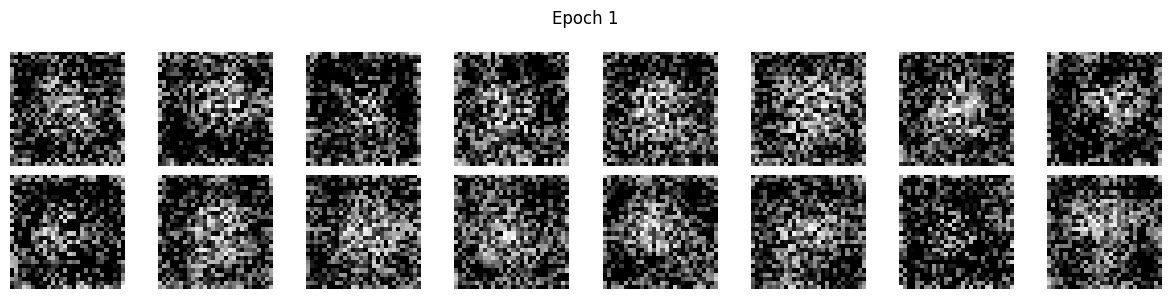


 🚀 EPOCH 2/16 | Status: HEALTHY         | Factor: 1.000
 🌀 LANGEVIN | Steps: 500 | StepSize: 0.4900 | Noise: 0.00010
 🧠 OPTIMER  | LR: 2.00e-05 | Dropout: 0.0100 | Reg: 0.00100 | Best ΔE: -0.132976
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |    -0.527895 |    -0.537576 |     0.009681 |     2.148103 |     2.685679
    10 |    -0.464890 |    -0.475254 |     0.010364 |     2.265940 |     2.741194
    20 |    -0.505881 |    -0.516793 |     0.010912 |     2.308791 |     2.825583
    30 |    -0.501804 |    -0.513496 |     0.011692 |     2.401331 |     2.914827
    40 |    -0.490528 |    -0.503589 |     0.013061 |     2.559192 |     3.062781
    50 |    -0.463851 |    -0.474836 |     0.010985 |     2.407332 |     2.882168
    60 |    -0.507273 |    -0.518049 |     0.010776 |     2.357168 |     2.875217
    70 |    -0.611159 |    -0.622452 |     0.0112

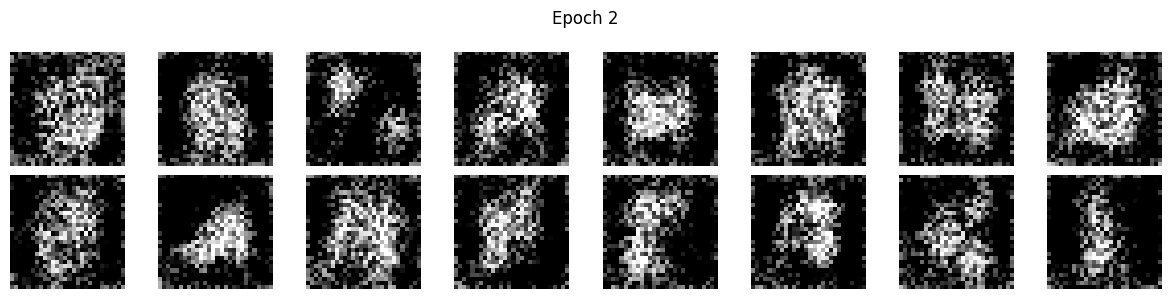


 🚀 EPOCH 3/16 | Status: HEALTHY         | Factor: 1.000
 🌀 LANGEVIN | Steps: 500 | StepSize: 0.4802 | Noise: 0.00010
 🧠 OPTIMER  | LR: 2.00e-05 | Dropout: 0.0200 | Reg: 0.00100 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |    -0.561976 |    -0.569701 |     0.007725 |     2.099781 |     2.669482
    10 |    -0.337321 |    -0.343747 |     0.006427 |     2.008656 |     2.352403
    20 |    -0.410502 |    -0.417148 |     0.006646 |     2.007530 |     2.424678
    30 |    -0.452434 |    -0.459432 |     0.006998 |     2.043536 |     2.502968
    40 |    -0.418839 |    -0.425550 |     0.006711 |     2.013418 |     2.438968
    50 |    -0.428921 |    -0.435045 |     0.006124 |     1.963970 |     2.399015
    60 |    -0.431068 |    -0.437281 |     0.006213 |     1.980026 |     2.417307
    70 |    -0.492152 |    -0.499531 |     0.0073

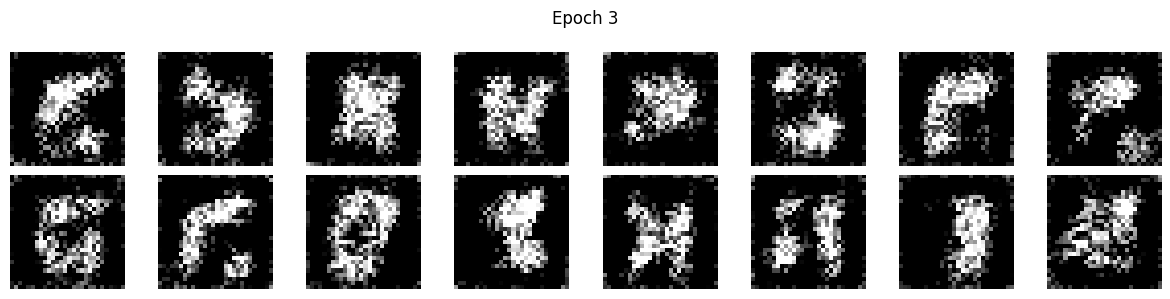


 🚀 EPOCH 4/16 | Status: HEALTHY (Boost) | Factor: 1.100
 🌀 LANGEVIN | Steps: 500 | StepSize: 0.4706 | Noise: 0.00010
 🧠 OPTIMER  | LR: 2.20e-05 | Dropout: 0.0300 | Reg: 0.00090 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |    -0.396021 |    -0.400168 |     0.004147 |     1.738469 |     2.138638
    10 |    -0.329331 |    -0.333635 |     0.004305 |     1.812039 |     2.145675
    20 |    -0.386030 |    -0.390269 |     0.004238 |     1.765062 |     2.155330
    30 |    -0.350019 |    -0.353881 |     0.003862 |     1.694186 |     2.048067
    40 |    -0.238917 |    -0.242433 |     0.003516 |     1.667047 |     1.909480
    50 |    -0.263796 |    -0.266848 |     0.003052 |     1.574862 |     1.841710
    60 |    -0.313079 |    -0.316080 |     0.003001 |     1.533781 |     1.849861
    70 |    -0.284993 |    -0.287981 |     0.0029

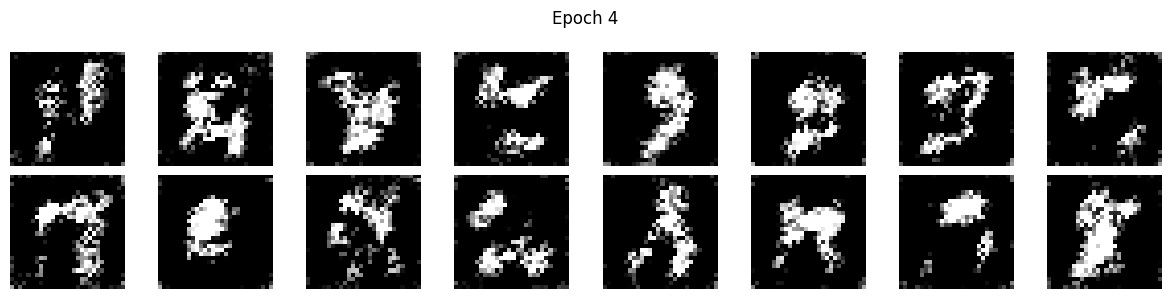


 🚀 EPOCH 5/16 | Status: HEALTHY         | Factor: 1.100
 🌀 LANGEVIN | Steps: 500 | StepSize: 0.5073 | Noise: 0.00010
 🧠 OPTIMER  | LR: 2.20e-05 | Dropout: 0.0400 | Reg: 0.00090 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |    -0.081636 |    -0.082921 |     0.001286 |     1.151048 |     1.233969
    10 |    -0.136517 |    -0.137698 |     0.001181 |     1.074192 |     1.211890
    20 |    -0.171368 |    -0.172581 |     0.001213 |     1.071746 |     1.244327
    30 |    -0.202124 |    -0.203346 |     0.001222 |     1.057365 |     1.260711
    40 |    -0.233531 |    -0.234717 |     0.001186 |     1.023363 |     1.258080
    50 |    -0.196456 |    -0.197489 |     0.001033 |     0.993572 |     1.191060
    60 |    -0.228267 |    -0.229223 |     0.000956 |     0.933564 |     1.162787
    70 |    -0.294142 |    -0.295109 |     0.0009

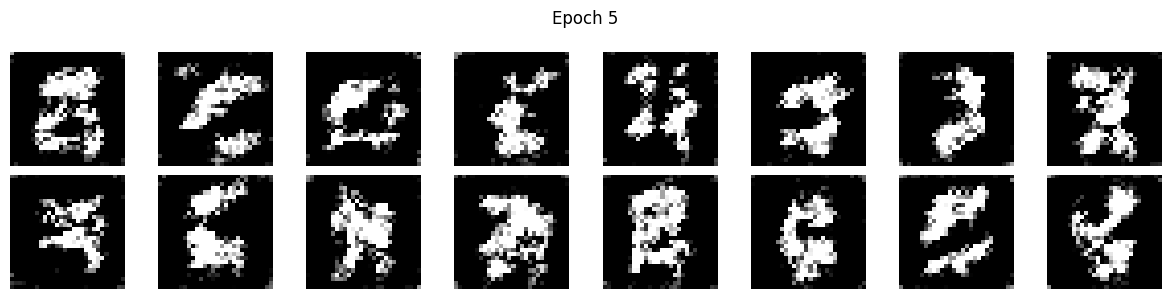


 🚀 EPOCH 6/16 | Status: HEALTHY         | Factor: 1.100
 🌀 LANGEVIN | Steps: 500 | StepSize: 0.4972 | Noise: 0.00010
 🧠 OPTIMER  | LR: 2.20e-05 | Dropout: 0.0500 | Reg: 0.00090 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |    -0.274296 |    -0.274852 |     0.000556 |     0.711646 |     0.986498
    10 |    -0.224783 |    -0.225226 |     0.000443 |     0.643515 |     0.868741
    20 |    -0.220662 |    -0.221064 |     0.000402 |     0.608782 |     0.829846
    30 |    -0.227409 |    -0.227882 |     0.000474 |     0.667491 |     0.895373
    40 |    -0.192491 |    -0.192995 |     0.000504 |     0.712710 |     0.905706
    50 |    -0.240800 |    -0.241224 |     0.000424 |     0.632837 |     0.874061
    60 |    -0.291420 |    -0.291891 |     0.000471 |     0.646099 |     0.937990
    70 |    -0.253632 |    -0.253958 |     0.0003

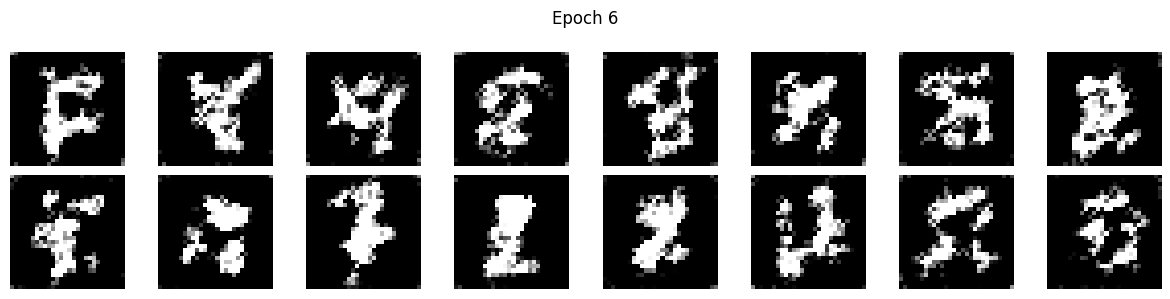


 🚀 EPOCH 7/16 | Status: HEALTHY (Boost) | Factor: 1.210
 🌀 LANGEVIN | Steps: 500 | StepSize: 0.4872 | Noise: 0.00010
 🧠 OPTIMER  | LR: 2.42e-05 | Dropout: 0.0600 | Reg: 0.00081 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |    -0.281165 |    -0.281336 |     0.000171 |     0.341103 |     0.622439
    10 |    -0.304385 |    -0.304613 |     0.000227 |     0.414389 |     0.719001
    20 |    -0.269922 |    -0.270184 |     0.000262 |     0.482131 |     0.752314
    30 |    -0.251511 |    -0.251687 |     0.000175 |     0.358963 |     0.610650
    40 |    -0.281004 |    -0.281232 |     0.000228 |     0.431553 |     0.712785
    50 |    -0.289120 |    -0.289339 |     0.000219 |     0.428980 |     0.718320
    60 |    -0.289942 |    -0.290123 |     0.000182 |     0.365519 |     0.655642
    70 |    -0.265256 |    -0.265407 |     0.0001


 🚀 EPOCH 8/16 | Status: HEALTHY         | Factor: 1.210
 🌀 LANGEVIN | Steps: 500 | StepSize: 0.5252 | Noise: 0.00010
 🧠 OPTIMER  | LR: 2.42e-05 | Dropout: 0.0700 | Reg: 0.00081 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |    -0.239511 |    -0.239583 |     0.000072 |     0.178399 |     0.417982
    10 |    -0.265405 |    -0.265528 |     0.000123 |     0.307822 |     0.573349
    20 |    -0.283468 |    -0.283586 |     0.000118 |     0.282197 |     0.565783
    30 |    -0.236713 |    -0.236777 |     0.000064 |     0.153692 |     0.390468
    40 |    -0.218940 |    -0.218991 |     0.000052 |     0.115829 |     0.334820
    50 |    -0.279874 |    -0.279925 |     0.000051 |     0.061079 |     0.341005
    60 |    -0.312249 |    -0.312335 |     0.000085 |     0.190602 |     0.502937
    70 |    -0.304460 |    -0.304578 |     0.0001


 🚀 EPOCH 9/16 | Status: HEALTHY         | Factor: 1.210
 🌀 LANGEVIN | Steps: 500 | StepSize: 0.5147 | Noise: 0.00010
 🧠 OPTIMER  | LR: 2.42e-05 | Dropout: 0.0800 | Reg: 0.00081 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |     0.472728 |     0.470785 |     0.001943 |     2.248636 |     1.777851
    10 |     0.388995 |     0.387043 |     0.001952 |     2.217711 |     1.830668
    20 |     0.278800 |     0.276688 |     0.002112 |     2.250566 |     1.973878
    30 |     0.170952 |     0.168650 |     0.002303 |     2.296172 |     2.127522
    40 |     0.088102 |     0.085483 |     0.002619 |     2.404474 |     2.318992
    50 |     0.216781 |     0.214190 |     0.002591 |     2.515378 |     2.301188
    60 |     0.278145 |     0.276237 |     0.001909 |     2.198507 |     1.922271
    70 |     0.205228 |     0.203406 |     0.0018


 🚀 EPOCH 10/16 | Status: HEALTHY (Boost) | Factor: 1.331
 🌀 LANGEVIN | Steps: 550 | StepSize: 0.5044 | Noise: 0.00009
 🧠 OPTIMER  | LR: 2.66e-05 | Dropout: 0.0900 | Reg: 0.00073 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |     0.214885 |     0.213797 |     0.001087 |     1.788346 |     1.574549
    10 |     0.147984 |     0.146820 |     0.001164 |     1.815989 |     1.669169
    20 |     0.142548 |     0.141429 |     0.001119 |     1.779636 |     1.638207
    30 |     0.116861 |     0.115784 |     0.001077 |     1.733841 |     1.618056
    40 |     0.045841 |     0.044725 |     0.001116 |     1.729405 |     1.684680
    50 |     0.094067 |     0.092985 |     0.001082 |     1.769985 |     1.676999
    60 |     0.128544 |     0.127488 |     0.001055 |     1.766270 |     1.638782
    70 |     0.127804 |     0.126770 |     0.001

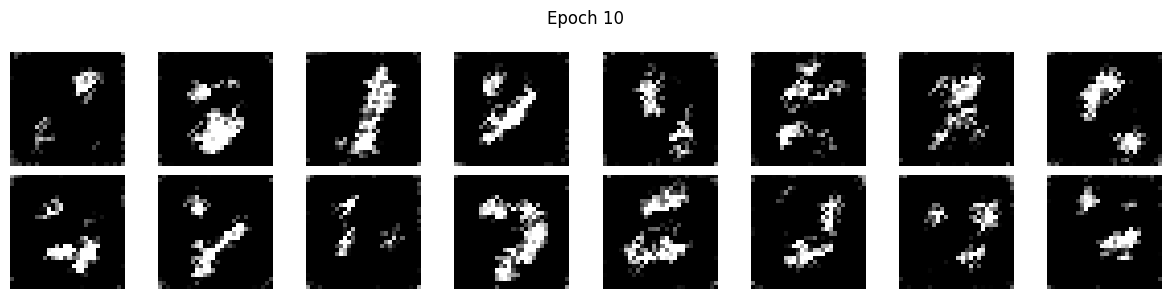


 🚀 EPOCH 11/16 | Status: HEALTHY         | Factor: 1.331
 🌀 LANGEVIN | Steps: 550 | StepSize: 0.5438 | Noise: 0.00009
 🧠 OPTIMER  | LR: 2.66e-05 | Dropout: 0.1000 | Reg: 0.00073 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |     0.189978 |     0.189453 |     0.000524 |     1.383902 |     1.194448
    10 |     0.183560 |     0.183027 |     0.000534 |     1.394528 |     1.211502
    20 |     0.173227 |     0.172670 |     0.000556 |     1.416398 |     1.243728
    30 |     0.142165 |     0.141621 |     0.000544 |     1.385158 |     1.243537
    40 |     0.148067 |     0.147536 |     0.000531 |     1.373817 |     1.226281
    50 |     0.111262 |     0.110733 |     0.000529 |     1.386200 |     1.275467
    60 |     0.105090 |     0.104581 |     0.000509 |     1.359626 |     1.255045
    70 |     0.131435 |     0.130934 |     0.000


 🚀 EPOCH 12/16 | Status: HEALTHY         | Factor: 1.331
 🌀 LANGEVIN | Steps: 550 | StepSize: 0.5329 | Noise: 0.00009
 🧠 OPTIMER  | LR: 2.66e-05 | Dropout: 0.1100 | Reg: 0.00073 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |     0.053123 |     0.052789 |     0.000334 |     1.165354 |     1.112566
    10 |     0.025345 |     0.025002 |     0.000343 |     1.166522 |     1.141520
    20 |     0.070137 |     0.069780 |     0.000357 |     1.213245 |     1.143465
    30 |     0.044047 |     0.043692 |     0.000355 |     1.198568 |     1.154877
    40 |     0.035035 |     0.034688 |     0.000348 |     1.179737 |     1.145050
    50 |     0.035533 |     0.035189 |     0.000345 |     1.205093 |     1.169904
    60 |    -0.002906 |    -0.003288 |     0.000382 |     1.250980 |     1.254269
    70 |     0.016957 |     0.016608 |     0.000

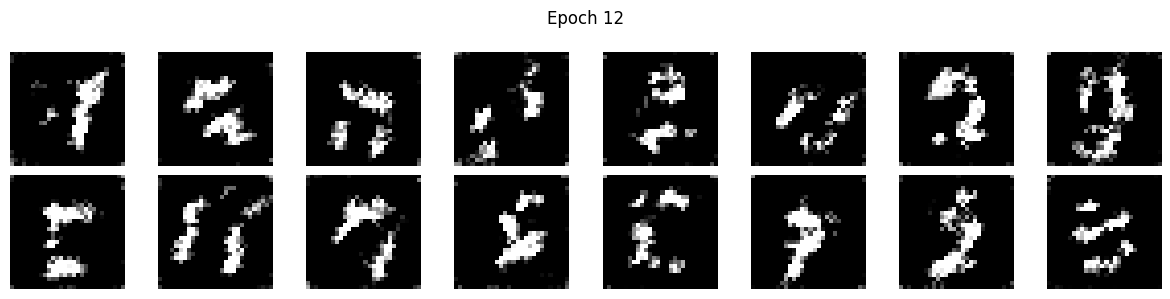


 🚀 EPOCH 13/16 | Status: HEALTHY (Boost) | Factor: 1.464
 🌀 LANGEVIN | Steps: 550 | StepSize: 0.5222 | Noise: 0.00009
 🧠 OPTIMER  | LR: 2.93e-05 | Dropout: 0.1200 | Reg: 0.00066 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |     0.065958 |     0.065768 |     0.000190 |     0.979037 |     0.913269
    10 |     0.074985 |     0.074801 |     0.000184 |     0.964922 |     0.890122
    20 |     0.009806 |     0.009646 |     0.000160 |     0.864097 |     0.854451
    30 |     0.029697 |     0.029544 |     0.000153 |     0.857428 |     0.827884
    40 |     0.019587 |     0.019398 |     0.000189 |     0.947256 |     0.927858
    50 |     0.074845 |     0.074706 |     0.000140 |     0.845253 |     0.770547
    60 |     0.070280 |     0.070177 |     0.000103 |     0.724110 |     0.653933
    70 |     0.097352 |     0.097249 |     0.000


 🚀 EPOCH 14/16 | Status: HEALTHY         | Factor: 1.464
 🌀 LANGEVIN | Steps: 550 | StepSize: 0.5630 | Noise: 0.00009
 🧠 OPTIMER  | LR: 2.93e-05 | Dropout: 0.1300 | Reg: 0.00066 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |     0.093950 |     0.093899 |     0.000051 |     0.500713 |     0.406814
    10 |     0.077332 |     0.077266 |     0.000066 |     0.575981 |     0.498716
    20 |     0.075871 |     0.075801 |     0.000070 |     0.590516 |     0.514714
    30 |     0.086875 |     0.086815 |     0.000060 |     0.546945 |     0.460130
    40 |     0.039220 |     0.039143 |     0.000077 |     0.603283 |     0.564141
    50 |     0.111053 |     0.110986 |     0.000067 |     0.597624 |     0.486638
    60 |     0.105904 |     0.105836 |     0.000068 |     0.597538 |     0.491701
    70 |     0.103261 |     0.103207 |     0.000


 🚀 EPOCH 15/16 | Status: HEALTHY         | Factor: 1.464
 🌀 LANGEVIN | Steps: 550 | StepSize: 0.5517 | Noise: 0.00009
 🧠 OPTIMER  | LR: 2.93e-05 | Dropout: 0.1400 | Reg: 0.00066 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |    -0.151679 |    -0.152853 |     0.001174 |     2.122156 |     2.275009
    10 |    -0.417227 |    -0.418820 |     0.001593 |     2.121217 |     2.540037
    20 |    -0.416233 |    -0.417673 |     0.001440 |     2.004601 |     2.422274
    30 |    -0.422836 |    -0.424387 |     0.001550 |     2.086277 |     2.510664
    40 |    -0.370822 |    -0.372444 |     0.001622 |     2.169235 |     2.541678
    50 |    -0.330672 |    -0.332173 |     0.001501 |     2.099468 |     2.431641
    60 |    -0.463011 |    -0.464564 |     0.001553 |     2.128648 |     2.593212
    70 |    -0.426168 |    -0.427841 |     0.001

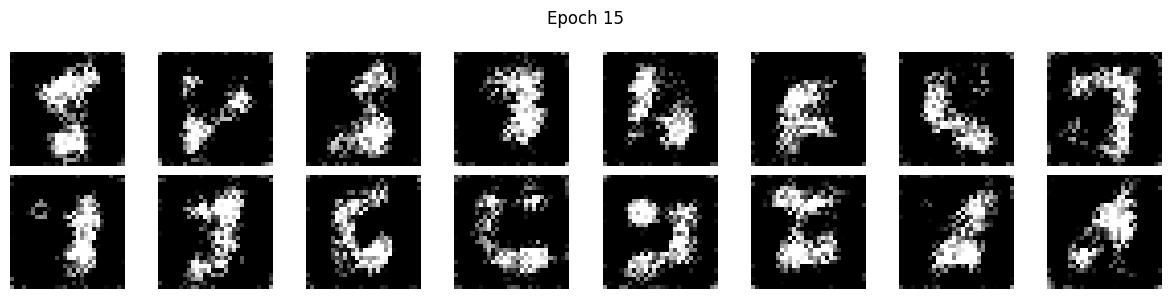


 🚀 EPOCH 16/16 | Status: HEALTHY (Boost) | Factor: 1.611
 🌀 LANGEVIN | Steps: 550 | StepSize: 0.5407 | Noise: 0.00009
 🧠 OPTIMER  | LR: 3.22e-05 | Dropout: 0.1500 | Reg: 0.00059 | Best ΔE: -0.290196
 Batch |         Loss |         Data |          Reg |       E_real |       E_fake
-----------------------------------------------------------------------------------------------
     0 |    -0.003080 |    -0.003986 |     0.000906 |     1.953763 |     1.957749
    10 |    -0.122299 |    -0.123200 |     0.000900 |     1.888547 |     2.011747
    20 |    -0.142005 |    -0.142771 |     0.000766 |     1.725368 |     1.868139
    30 |    -0.200134 |    -0.200922 |     0.000788 |     1.721752 |     1.922674
    40 |    -0.146105 |    -0.146859 |     0.000754 |     1.709647 |     1.856506
    50 |    -0.181440 |    -0.182096 |     0.000656 |     1.615410 |     1.797506
    60 |    -0.174777 |    -0.175421 |     0.000645 |     1.602346 |     1.777767
    70 |    -0.150655 |    -0.151222 |     0.000

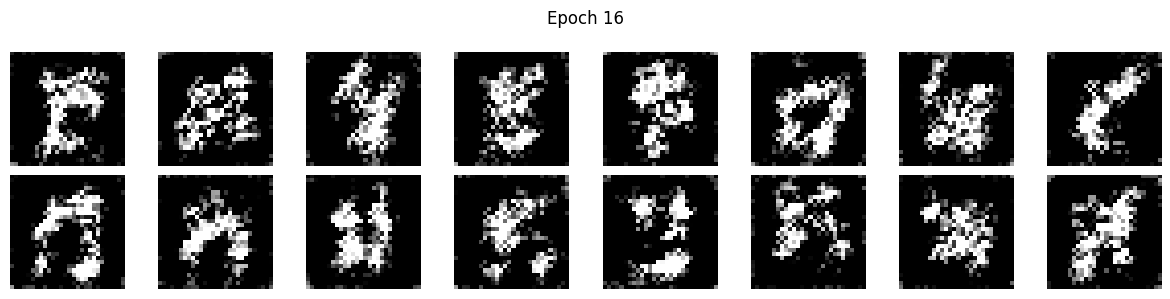

In [27]:
for epoch in range(1, epochs + 1):
    # Apply current dynamic values
    set_dropout(model, current_dropout)
    
    for param_group in optimizer.param_groups:
        param_group['lr'] = current_lr

    status_msg = "STABLE"
    
    # LOGIC CONTROL
    if epoch > 1 and 'data' in history and len(history['data']) > 0:
        latest_delta = history['data'][-1]
        latest_E_real = history['E_real'][-1]
        
        if latest_delta > 0.5 or np.isnan(latest_delta):
            status_msg = "CRITICAL (Brake)"
            stable_epoch_counter = 0
            
            # Rollback logic
            if os.path.exists(checkpoint_path):
                try:
                    model.load_state_dict(torch.load(checkpoint_path))
                    print("--> Model rolled back to best checkpoint.")
                except:
                    pass
            
            adaptation_factor *= 0.5
            current_lr *= 0.5
            
            # Reset dynamics to safer values
            current_l_step_size = max(MIN_STEP_SIZE, base_l_step_size * adaptation_factor)
            current_l_noise = max(MIN_NOISE, current_l_noise * 0.8)     # Reduce noise to reduce variance
            current_dropout = max(MIN_DROPOUT, current_dropout * 0.8)   # Reduce dropout to let model learn easier patterns
            current_reg *= 1.1                                          # Slightly increase reg to constrain energy
            
        # B. WARNING: Energy Collapse
        elif latest_E_real < -0.05:
            status_msg = "WARNING (Collapse)"
            stable_epoch_counter = 0
            
            current_reg *= 1.5  
            current_lr *= 0.9    
            cfg["training"]["lambda_reg"] = current_reg
            
            # Increase entropy generators
            current_l_noise = min(MAX_NOISE, current_l_noise * 1.5)      
            current_dropout = min(MAX_DROPOUT, current_dropout + 0.05)   

        
        # C. HEALTHY: (Accelerate or Maintain)
        else:
            status_msg = "HEALTHY"
            stable_epoch_counter += 1
            
            # 1. Refinement (Decay Noise & Step Size)
            current_l_noise = max(MIN_NOISE, base_l_noise * (0.95 ** (epoch // 5))) 
            current_l_step_size = max(MIN_STEP_SIZE, base_l_step_size * (0.98 ** (epoch-1)) * adaptation_factor)
            
            # 2. Generalization (Increase Dropout Slowly)
            if current_dropout < MAX_DROPOUT:
                current_dropout += 0.01
            
            # 3. Bidirectional Adaptation (Boost)
            if stable_epoch_counter >= 3:
                status_msg = "HEALTHY (Boost)"
                adaptation_factor = min(2.0, adaptation_factor * 1.1)
                
                current_lr = min(base_lr * 5, current_lr * 1.1)       # Speed up training
                current_reg = max(base_reg * 0.1, current_reg * 0.9)  # Relax regularization
                stable_epoch_counter = 0
            
            # 4. Increase Steps periodically
            if epoch % 10 == 0:
                current_l_steps = min(1000, current_l_steps + 50)

    
    print("\n" + "="*100)
    print(f" 🚀 EPOCH {epoch}/{epochs} | Status: {status_msg:15s} | Factor: {adaptation_factor:.3f}")
    print(f" 🌀 LANGEVIN | Steps: {current_l_steps} | StepSize: {current_l_step_size:.4f} | Noise: {current_l_noise:.5f}")
    print(f" 🧠 OPTIMER  | LR: {current_lr:.2e} | Dropout: {current_dropout:.4f} | Reg: {current_reg:.5f} | Best ΔE: {best_delta:.6f}")
    print("="*100)

    history, best_delta = train_one_epoch(
        model, train_loader, optimizer, langevin_sampling,
        device, epoch, cfg, checkpoint_dir, history, best_delta,
        steps=current_l_steps, 
        step_size=current_l_step_size,
        noise=current_l_noise        
    )

    if 'data' in history:
        scheduler.step(history['data'][-1])

    with torch.no_grad():
        # Generate samples for visualization
        x_gen = generate_samples(model, langevin_sampling, cfg, device, steps=current_l_steps) # Use current steps
        show_batch(x_gen, title=f"Epoch {epoch}")

In [29]:
model.eval()  

x_gen = langevin_sampling(
    model=model,
    x_start=None,
    batch_size=cfg["sampling"]["n_samples"],
    steps=cfg["langevin"]["steps"],
    step_size=cfg["langevin"]["step_size"],
    noise_scale=cfg["langevin"]["noise_scale"],
    device=device,
    add_noise=True, 
    c_min=cfg["langevin"]["clamp_min"],
    c_max=cfg["langevin"]["clamp_max"]
)


show_batch(x_gen, title="Generated samples (Langevin from Uniform noise)")


data_iter = iter(train_loader)
x_real, _ = next(data_iter)
x_real = x_real[:cfg["sampling"]["n_samples"]]

show_batch(x_real, title="Real MNIST samples (train context)")

In [30]:
def add_gaussian_noise(x, sigma):
    noise = sigma * torch.randn_like(x)
    x_noisy = x + noise
    return x_noisy.clamp(0.0, 1.0)


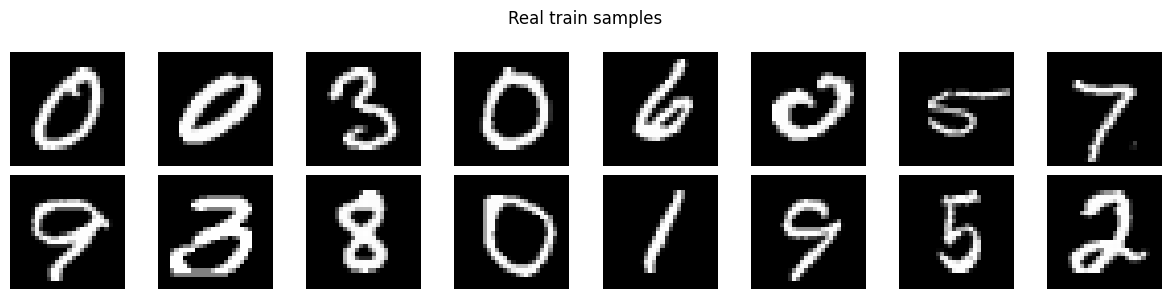

In [31]:
x_real, _ = next(iter(train_loader))
x_real = x_real[:cfg["sampling"]["n_samples"]]

show_batch(
    x_real,
    title="Real train samples"
)


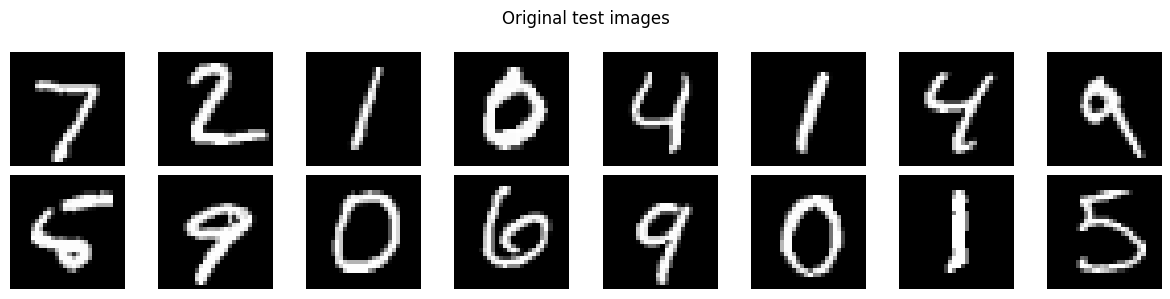


--------------------------------------------------
🚀 Running Denoising for σ = 0.2
--------------------------------------------------


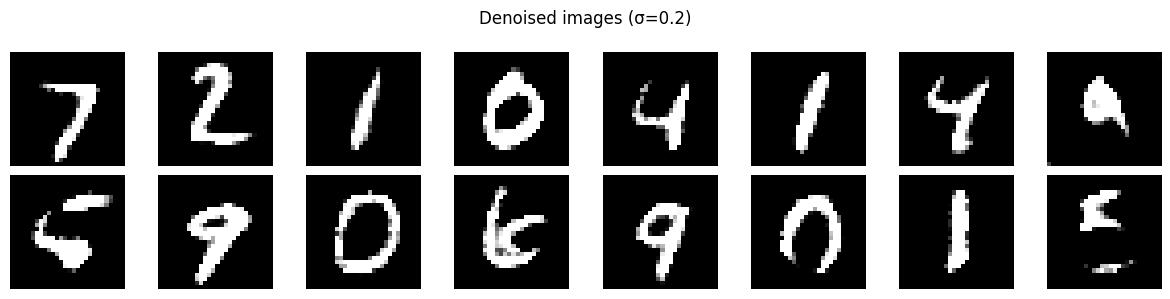


--------------------------------------------------
🚀 Running Denoising for σ = 0.4
--------------------------------------------------


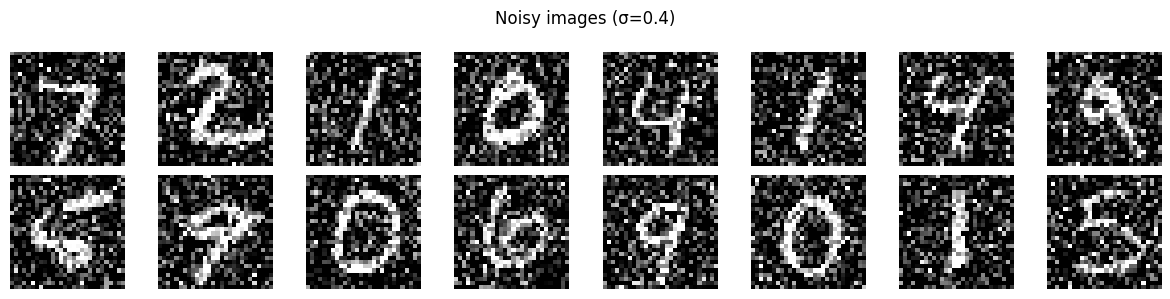

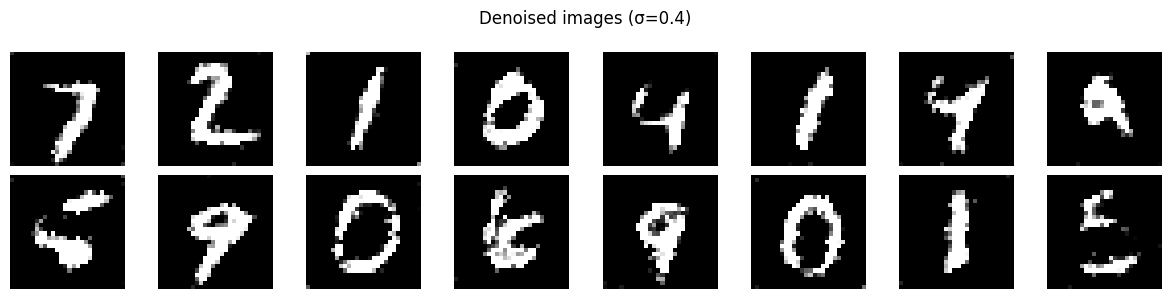


--------------------------------------------------
🚀 Running Denoising for σ = 0.6
--------------------------------------------------


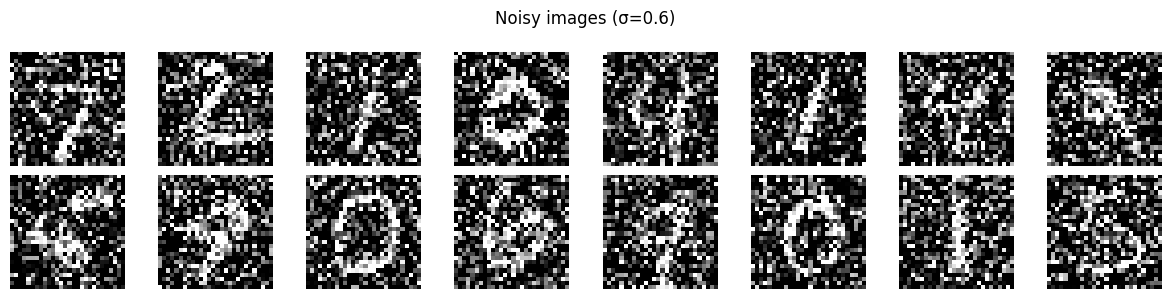

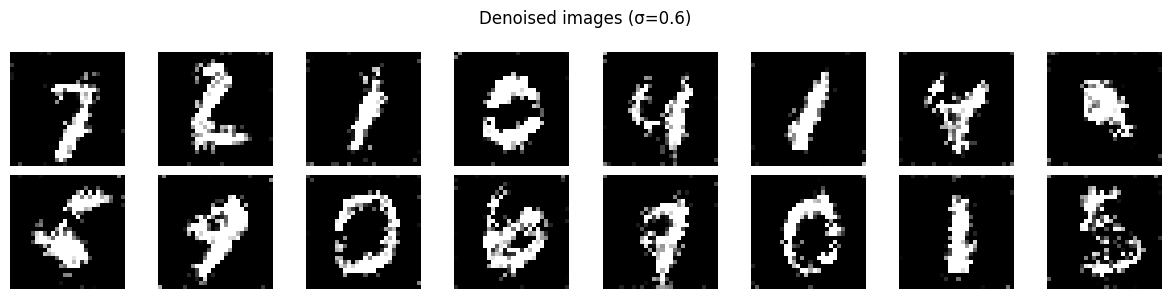

In [35]:
model.eval()


noise_levels = [0.2, 0.4, 0.6] 

x_clean, _ = next(iter(test_loader))
x_clean = x_clean.to(device)

show_batch(x_clean, title="Original test images")

for sigma in noise_levels:
    print(f"\n" + "-"*50)
    print(f"🚀 Running Denoising for σ = {sigma}")
    print("-"*50)

    x_noisy = torch.clamp(x_clean + sigma * torch.randn_like(x_clean), 0.0, 1.0)
    show_batch(x_noisy, title=f"Noisy images (σ={sigma})")

    
    x_denoised = langevin_sampling(
        model=model,
        x_start=x_noisy, 
        batch_size=x_noisy.size(0),
        steps=cfg["langevin"]["steps"],
        step_size=cfg["langevin"]["step_size"],
        noise_scale=cfg["langevin"]["noise_scale"],
        device=device,
        add_noise=True,   
        c_min=cfg["langevin"]["clamp_min"],
        c_max=cfg["langevin"]["clamp_max"]
    )

    show_batch(x_denoised, title=f"Denoised images (σ={sigma})")